In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from datetime import datetime

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm, skew
from scipy import stats
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [3]:
#train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
#test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print("Train set size: ",train.shape)
print("Test set size: ", test.shape)

Train set size:  (1460, 81)
Test set size:  (1459, 80)


In [5]:
train_Id = train['Id']
test_Id = test['Id']

train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [6]:
train = train[train['GrLivArea']<4000]
train.reset_index(drop=True, inplace=True)

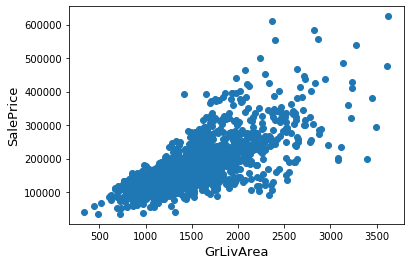

In [7]:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [8]:
train['SalePrice'] = np.log1p(train['SalePrice'])
y_train = train['SalePrice']
train_features= train.drop(['SalePrice'], axis=1)
test_features = test

In [9]:
features = pd.concat([train_features, test_features]).reset_index(drop=True)

In [10]:
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

In [11]:
features.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,2429.00000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2892.000000,2914.000000,2914.000000,2914.000000,...,2756.000000,2914.000000,2914.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000
mean,69.12886,10133.648714,6.083705,5.565009,1971.271698,1984.240480,101.399378,438.098147,49.650309,560.638298,...,1978.079826,1.765271,472.169183,93.503945,47.268611,23.130017,2.605832,16.084391,1.899828,50.895712
std,22.71544,7806.198515,1.403444,1.113718,30.290998,20.897341,177.452915,442.872077,169.311762,439.704419,...,25.576507,0.761105,214.498199,126.455095,67.139563,64.282620,25.205266,56.219760,33.020598,567.788382
min,21.00000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.00000,7474.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,220.000000,...,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68.00000,9450.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,...,1979.000000,2.000000,479.500000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.00000,11554.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,732.000000,0.000000,803.750000,...,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.00000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4010.000000,1526.000000,2336.000000,...,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000


In [12]:
features['Alley'].fillna('None', inplace=True)
features['Fence'].fillna('None', inplace=True)
features['FireplaceQu'].fillna('None', inplace=True)

features['GarageQual'].fillna('None', inplace=True)
features['GarageFinish'].fillna('None', inplace=True)
features['GarageCond'].fillna('None', inplace=True)
features['GarageType'].fillna('None', inplace=True)

features['BsmtExposure'].fillna('None', inplace=True)
features['BsmtCond'].fillna('None', inplace=True)
features['BsmtQual'].fillna('None', inplace=True)
features['BsmtFinType2'].fillna('None', inplace=True)
features['BsmtFinType1'].fillna('None', inplace=True)

In [13]:
features['MasVnrType'].fillna('None', inplace=True)
features['HasMasVnr'] = features['MasVnrType'].apply(lambda x: 0 if x == 'None' else 1)

features['MSZoning'] = features.groupby(['MSSubClass'])['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
features['Functional'].fillna('Typ', inplace=True)
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])


In [14]:
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
features['GarageYrBlt'] = (features['YearRemodAdd'])

In [15]:
features['GarageArea'].fillna(0, inplace=True)
features['GarageCars'].fillna(0, inplace=True)

In [16]:
features['GarageType']= features['GarageType'].fillna('None', inplace=True)
features['GarageFinish']= features['GarageFinish'].fillna('None', inplace=True)
features['GarageQual']= features['GarageQual'].fillna('None', inplace=True)
features['GarageCond'] = features['GarageCond'].fillna('None', inplace=True)

In [17]:
features['TotalBsmtSF'].fillna(0, inplace=True)
features['BsmtUnfSF'].fillna(0, inplace=True)
features['BsmtFinSF1'].fillna(0, inplace=True)
features['BsmtFinSF2'].fillna(0, inplace=True)
features['BsmtFullBath'].fillna(0, inplace=True)
features['BsmtHalfBath'].fillna(0, inplace=True)

In [18]:
features= features.drop(['Utilities', 'Street', 'PoolQC', 'MiscFeature', 'MiscVal'], axis=1)

In [19]:
features['YrBltandRemod'] = features['YearRemodAdd']-features['YearBuilt']
features['SqFtAbove'] = features['1stFlrSF']+features['2ndFlrSF']
features['TotalSF'] = features['TotalBsmtSF']+features['1stFlrSF']+features['2ndFlrSF']
features['TotalSqrFt'] = features['BsmtFinSF1']+features['BsmtFinSF2']+features['1stFlrSF']+features['2ndFlrSF']
features['Total_BathroomsAbv'] = features['FullBath']+(0.5 * features['HalfBath'])
features['BsmtBathrooms'] = features['BsmtFullBath']+(0.5 * features['BsmtHalfBath'])
features['Total_Bathrooms'] = features['FullBath']+(0.5 * features['HalfBath']) + features['BsmtFullBath']+(0.5 * features['BsmtHalfBath'])
features['Total_Porch_sf'] = features['WoodDeckSF']+features['OpenPorchSF']+features['EnclosedPorch']+features['3SsnPorch']+features['ScreenPorch']
features['CoveredPorch_SF'] = features['EnclosedPorch'] + features['3SsnPorch']+features['ScreenPorch']
features['BsmtPerFin'] = features['BsmtUnfSF']/features['TotalBsmtSF']

In [20]:
pd.set_option('display.max_columns', 999)
features.head(15)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MoSold,YrSold,SaleType,SaleCondition,HasMasVnr,YrBltandRemod,SqFtAbove,TotalSF,TotalSqrFt,Total_BathroomsAbv,BsmtBathrooms,Total_Bathrooms,Total_Porch_sf,CoveredPorch_SF,BsmtPerFin
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,None,2003,None,2.0,548.0,None,None,Y,0,61,0,0,0,0,None,2,2008,WD,Normal,1,0,1710,2566.0,2416.0,2.5,1.0,3.5,61,0,0.175234
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,None,1976,None,2.0,460.0,None,None,Y,298,0,0,0,0,0,None,5,2007,WD,Normal,0,0,1262,2524.0,2240.0,2.0,0.5,2.5,298,0,0.225040
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,None,2002,None,2.0,608.0,None,None,Y,0,42,0,0,0,0,None,9,2008,WD,Normal,1,1,1786,2706.0,2272.0,2.5,1.0,3.5,42,0,0.471739
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,None,1970,None,3.0,642.0,None,None,Y,0,35,272,0,0,0,None,2,2006,WD,Abnorml,0,55,1717,2473.0,1933.0,1.0,1.0,2.0,307,272,0.714286
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,None,2000,None,3.0,836.0,None,None,Y,192,84,0,0,0,0,None,12,2008,WD,Normal,1,0,2198,3343.0,2853.0,2.5,1.0,3.5,276,0,0.427948
5,50,RL,85.0,14115,None,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,None,None,1995,None,2.0,480.0,None,None,Y,40,30,0,320,0,0,MnPrv,10,2009,WD,Normal,0,2,1362,2158.0,2094.0,1.5,1.0,2.5,390,320,0.080402
6,20,RL,75.0,10084,None,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,None,2005,None,2.0,636.0,None,None,Y,255,57,0,0,0,0,None,8,2007,WD,Normal,1,1,1694,3380.0,3063.0,2.0,1.0,3.0,312,0,0.188019
7,60,RL,80.0,10382,None,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,None,1973,None,2.0,484.0,None,None,Y,235,204,228,0,0,0,None,11,2009,WD,Normal,1,0,2090,3197.0,2981.0,2.5,1.0,3.5,667,228,0.195122
8,50,RM,51.0,6120,None,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,T

In [21]:
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x>0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x>0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x>0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x>0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x>0 else 0)
features['FurnishedBsmt'] = features['BsmtPerFin'].apply(lambda x: 1 if x==1.00 else 0)

In [22]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
features.update(features[numerics].fillna(0))

In [23]:
final_features = pd.get_dummies(features).reset_index(drop=True)

In [24]:
X= final_features.iloc[:len(y_train), :]
X_test = final_features.iloc[len(y_train):, :]

In [25]:
outliers = [30,88,462,524,631,1299,1322]
X = X.drop(X.index[outliers])
y_train = y_train.drop(y_train.index[outliers])

In [26]:
X.shape, y_train.shape, X_test.shape

((1449, 311), (1449,), (1459, 311))

In [27]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [28]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

In [29]:
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

In [30]:
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y_train, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [31]:
# setup models    
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [32]:
ridge = make_pipeline(RobustScaler(),RidgeCV(alphas=alphas_alt, cv=kfolds,))

In [33]:
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))

In [34]:
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, random_state=42, l1_ratio=e_l1ratio))

In [35]:
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [36]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =42)

In [37]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       #min_data_in_leaf=2,
                                       #min_sum_hessian_in_leaf=11
                                       )

In [38]:
xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006, random_state=42)

In [39]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet,
                                            gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [40]:
print('TEST score on CV')

score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )



TEST score on CV
Kernel Ridge score: 0.1058 (0.0095)
 2019-09-17 17:45:24.221371
Lasso score: 0.1047 (0.0087)
 2019-09-17 17:45:45.151905
ElasticNet score: 0.1048 (0.0088)
 2019-09-17 17:47:13.716676
SVR score: 0.1633 (0.0193)
 2019-09-17 17:47:19.771761
Lightgbm score: 0.1066 (0.0121)
 2019-09-17 17:47:29.770678
GradientBoosting score: 0.1080 (0.0114)
 2019-09-17 17:48:28.894926
[17:48:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:48:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:48:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

In [41]:
print(datetime.now(), 'StackingCVRegressor')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y_train))
print(datetime.now(), 'elasticnet')
elastic_model_full_data = elasticnet.fit(X, y_train)
print(datetime.now(), 'lasso')
lasso_model_full_data = lasso.fit(X, y_train)
print(datetime.now(), 'ridge')
ridge_model_full_data = ridge.fit(X, y_train)
print(datetime.now(), 'svr')
svr_model_full_data = svr.fit(X, y_train)
print(datetime.now(), 'GradientBoosting')
gbr_model_full_data = gbr.fit(X, y_train)
print(datetime.now(), 'xgboost')
xgb_model_full_data = xgboost.fit(X, y_train)
print(datetime.now(), 'lightgbm')
lgb_model_full_data = lightgbm.fit(X, y_train)

2019-09-17 17:48:58.005983 StackingCVRegressor
[17:50:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2019-09-17 17:51:12.334021 elasticnet
2019-09-17 17:51:20.773804

In [42]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [43]:
print('RMSLE score on train data:')
print(rmsle(y_train,blend_models_predict(X)))

RMSLE score on train data:
0.053908348765392


In [44]:
submission = pd.read_csv('sample_submission.csv')
submission.iloc[:,1] = np.floor(np.expm1(blend_models_predict(X_test)))
submission.head(15)

,Id,SalePrice
0,1461,126119.0
1,1462,162810.0
2,1463,185372.0
3,1464,202083.0
4,1465,191444.0
5,1466,172823.0
6,1467,176844.0
7,1468,166730.0
8,1469,189390.0
9,1470,123520.0


In [45]:
submission.to_csv("House_Price_Submission.csv", index=False)